![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.



In [1]:
import pandas as pd
import numpy as np
# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest # para hacer el ztest

import sys
sys.path.append("../")
from src.soporte_abtesting import(
    exploracion_dataframe,
    Asunciones,
    Pruebas_parametricas,
    elegir_test
)
import statistics as st 
from scipy import stats  
from scipy.stats import skew,kurtosis # libreria para asimetria y curtosis 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("datos/alas_del_mundo.csv")
df.head()

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0
3,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,4,0,0,0.0
4,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2018,10,6,3352,335.0


## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



In [3]:
exploracion_dataframe(df,"Gender")

El número de datos es 405624 y el de columnas es 16

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.312112



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Province,object
City,object
Gender,object
Education,object
Salary,float64
Loyalty Card,object
CLV,float64
Enrollment Type,object
Enrollment Year,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROVINCE tiene las siguientes valore únicos:


,count
Province,
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,count
City,
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,count
Education,
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna LOYALTY CARD tiene las siguientes valore únicos:


,count
Loyalty Card,
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,count
Enrollment Type,
Standard,382200
2018 Promotion,23424



 ..................... 

Los principales estadísticos de las columnas categóricas para el FEMALE son: 


,count,unique,top,freq
Province,203640,11,Ontario,64440
City,203640,29,Toronto,40272
Gender,203640,1,Female,203640
Education,203640,5,Bachelor,127872
Loyalty Card,203640,3,Star,91848
Enrollment Type,203640,2,Standard,191736



 ..................... 

Los principales estadísticos de las columnas numéricas para el FEMALE son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,203640.0,548039.567590,259443.515793,100018.00,324364.00,547500.00,773593.00,999986.00
Salary,153072.0,79260.219034,34384.857094,-58486.00,59265.00,73663.50,88978.00,407228.00
CLV,203640.0,7999.522370,6888.419380,1898.01,3980.84,5757.44,8982.85,83325.38
Enrollment Year,203640.0,2015.276841,1.972972,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,203640.0,6.661049,3.401924,1.00,4.00,7.00,10.00,12.00
Year,203640.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,203640.0,6.500000,3.452061,1.00,3.75,6.50,9.25,12.00
Flights Booked,203640.0,4.090542,5.214236,0.00,0.00,1.00,8.00,21.00
Distance,203640.0,1204.586987,1434.339525,0.00,0.00,447.00,2328.00,6240.00
Points Accumulated,203640.0,123.293699,146.788139,0.00,0.00,46.00,238.00,676.50



 ..................... 

Los principales estadísticos de las columnas categóricas para el MALE son: 


,count,unique,top,freq
Province,201984,11,Ontario,66456
City,201984,29,Toronto,40824
Gender,201984,1,Male,201984
Education,201984,5,Bachelor,125880
Loyalty Card,201984,3,Star,92376
Enrollment Type,201984,2,Standard,190464



 ..................... 

Los principales estadísticos de las columnas numéricas para el MALE son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,201984.0,552052.562025,258406.878328,100102.00,329004.5000,553404.00,770470.000,999982.00
Salary,149880.0,79277.616173,35601.765489,-57297.00,59262.0000,73277.00,88270.000,381124.00
CLV,201984.0,7984.368213,6838.623275,1898.01,4004.1275,5792.14,8901.215,83325.38
Enrollment Year,201984.0,2015.228018,1.985618,2012.00,2014.0000,2015.00,2017.000,2018.00
Enrollment Month,201984.0,6.675024,3.397583,1.00,4.0000,7.00,10.000,12.00
Year,201984.0,2017.500000,0.500001,2017.00,2017.0000,2017.50,2018.000,2018.00
Month,201984.0,6.500000,3.452061,1.00,3.7500,6.50,9.250,12.00
Flights Booked,201984.0,4.139764,5.236766,0.00,0.0000,1.00,8.000,21.00
Distance,201984.0,1213.208328,1431.950935,0.00,0.0000,526.00,2343.000,6293.00
Points Accumulated,201984.0,124.095014,146.408997,0.00,0.0000,54.00,240.000,675.00


# Comprobar nulos
Ver si podemos rellenar algún nulo que en otra fila tenga valor salario

In [4]:
cond= df["Salary"].isnull()
df_nans = df[cond]
lista_users = df_nans["Loyalty Number"].unique().tolist()

for user in lista_users:
    cond = df["Loyalty Number"] == user
    check = df[cond]
    cond_na = check["Salary"].notnull()
    if check[cond_na].shape[0] != 0:
        print(f"ID: {user} tiene salario")

# Rellenar via media

Vamos a realizar la media según género y loyalty card

In [5]:
media_salario = df.groupby(["Gender", "Loyalty Card"])["Salary"].mean().reset_index()
lista_genero = media_salario["Gender"].unique().tolist()
lista_tarjeta = media_salario["Loyalty Card"].unique().tolist()

salario_nulo = df["Salary"].isnull()

for genero in lista_genero:
    for tarjeta in lista_tarjeta:
        cond1 = media_salario["Gender"] == genero
        cond2 = media_salario["Loyalty Card"] == tarjeta
        media = media_salario[cond1 & cond2 ]["Salary"].values
        cond3 = df["Gender"] == genero
        cond4 = df["Loyalty Card"] == tarjeta

        df.loc[salario_nulo & cond3 & cond4,"Salary"] = media[0]                

In [6]:
cond = df["Salary"].isnull()
df[cond]

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated


Hemos eliminado los nulos correctamente

Ahora vamos a revisar que los salarios tienen formato correcto

In [7]:
con_negativo = df["Salary"] < 0
df[con_negativo].shape


(480, 16)

In [8]:
df["Salary"] = abs(df["Salary"])

### Conclusiones
Hay 1864 Duplicados

La columna salary tiene un 25% de valores nulos es la única columna con valores nulos

In [9]:
df.drop_duplicates(inplace=True)
cond = df.duplicated(keep=False)
df[cond]

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      403760 non-null  int64  
 1   Province            403760 non-null  object 
 2   City                403760 non-null  object 
 3   Gender              403760 non-null  object 
 4   Education           403760 non-null  object 
 5   Salary              403760 non-null  float64
 6   Loyalty Card        403760 non-null  object 
 7   CLV                 403760 non-null  float64
 8   Enrollment Type     403760 non-null  object 
 9   Enrollment Year     403760 non-null  int64  
 10  Enrollment Month    403760 non-null  int64  
 11  Year                403760 non-null  int64  
 12  Month               403760 non-null  int64  
 13  Flights Booked      403760 non-null  int64  
 14  Distance            403760 non-null  int64  
 15  Points Accumulated  403760 non-null  fl

Hemos corregido correctamente los datos, dentro de los recursos disponibles que tenemos vamos a realizar gráficas de distribución

In [11]:
df.sample()

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
182564,141181,British Columbia,Vancouver,Female,Bachelor,78483.0,Nova,7150.23,Standard,2015,11,2018,8,0,0,0.0


existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos ?

Veamos su distribución

### Número de vuelos reservados por nivel educativo

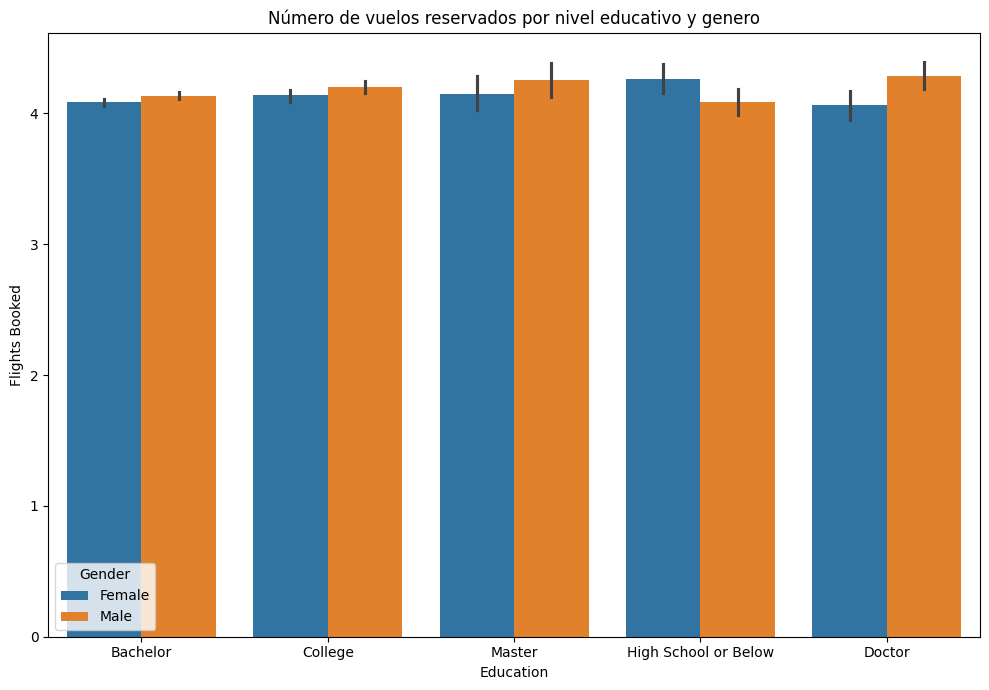

In [42]:
plt.figure(figsize=(10,7))
sns.barplot(x="Education",y="Flights Booked",hue="Gender",data=df)
plt.title("Número de vuelos reservados por nivel educativo y genero")
plt.tight_layout()

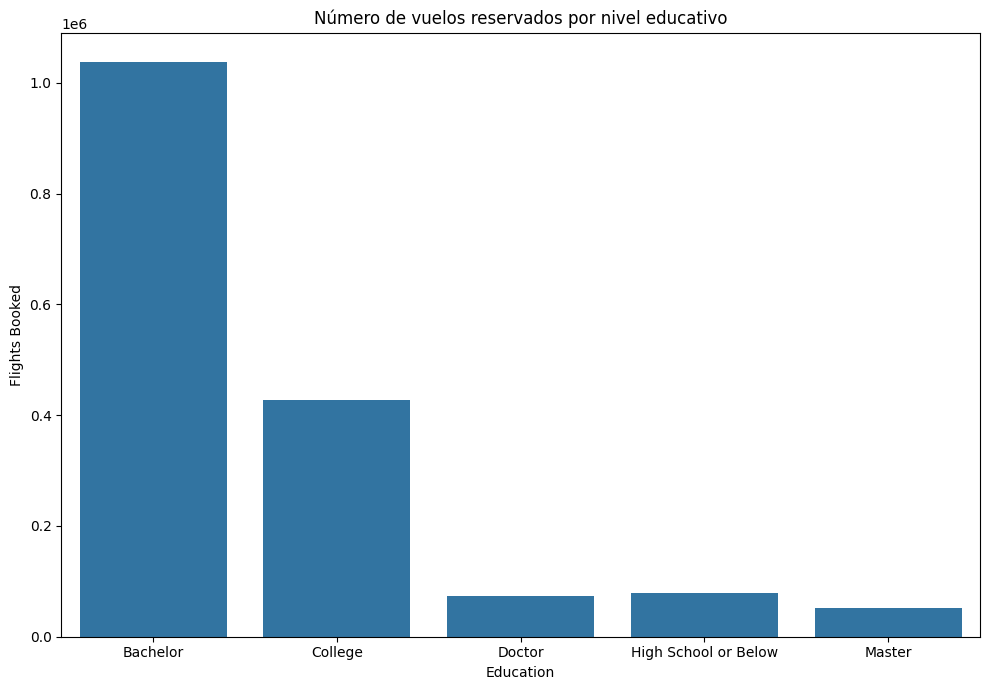

In [13]:
datos = df.groupby("Education")["Flights Booked"].sum().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="Education",y="Flights Booked",data=datos)
plt.title("Número de vuelos reservados por nivel educativo")
plt.tight_layout()

### Numero de vuelos reservados por nivel educativo y genero

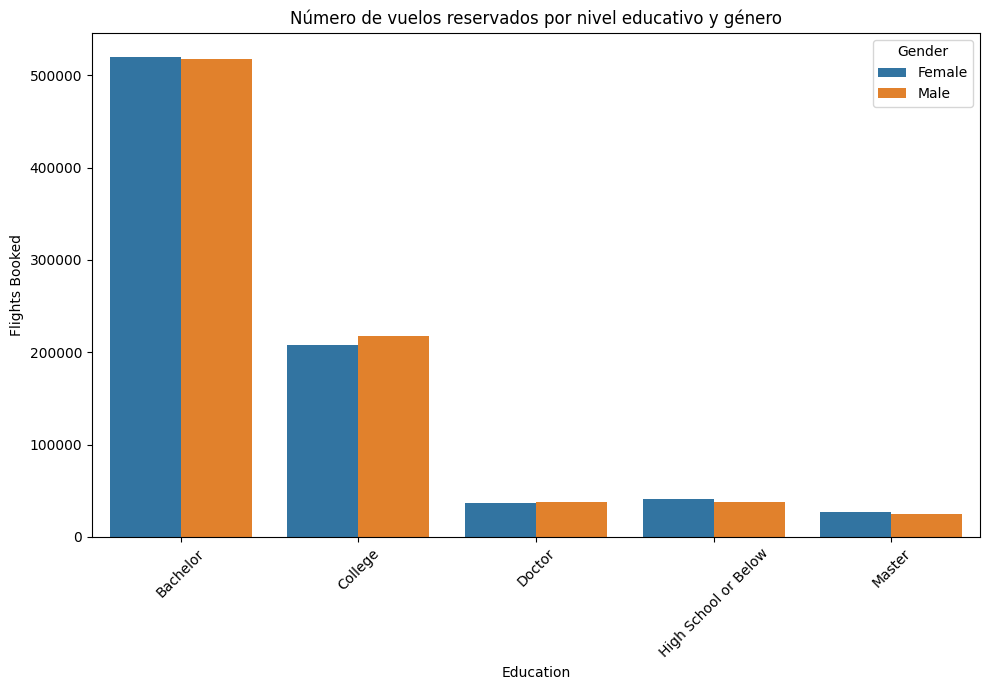

In [14]:
datos = df.groupby(["Education","Gender"])["Flights Booked"].sum().reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x="Education",y="Flights Booked", hue= "Gender",data=datos)
plt.title("Número de vuelos reservados por nivel educativo y género")
plt.xticks(rotation = 45)
plt.tight_layout()

existe una diferencia significativa entre el género de sus clientes y su salario?

Veamos su distribución

Text(0.5, 1.0, 'Salario Promedio por género')

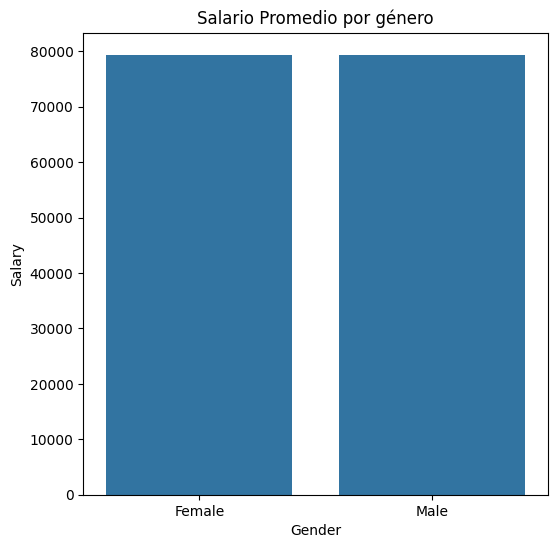

In [15]:
datos = df.groupby("Gender")["Salary"].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x="Gender",y="Salary",data=datos)
plt.title("Salario Promedio por género")


### Salario Promedio por género y nivel educativo

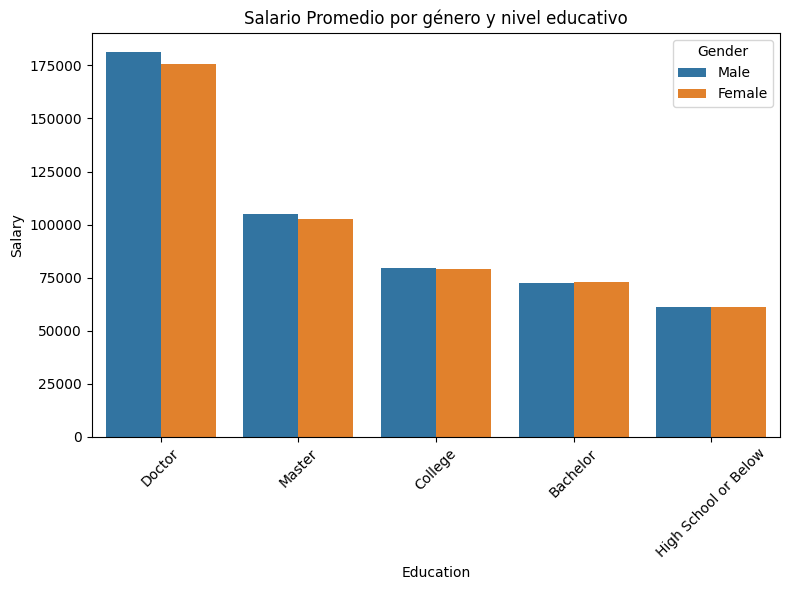

In [16]:
datos = df.groupby(["Gender","Education"])["Salary"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x="Education",y="Salary",hue="Gender",data=datos)
plt.title("Salario Promedio por género y nivel educativo")
plt.xticks(rotation=45)
plt.tight_layout()

In [17]:
df.sample()

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
126921,880849,Ontario,Toronto,Female,College,79703.727677,Nova,3567.5,Standard,2013,9,2018,10,13,3312,331.0


## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   
Vamos a trabajar con:
  - Education: columna_grupo
  - Flights Booked: columna_valor

## Hipotésis
- Nula (H0): No existe diferencia entre el número de vuelos y nivel educativo
- Alternativa (H1): Existe diferencia entre el número de vuelos y nivel educat

## Verificar si es paramétrica

### Normalidad

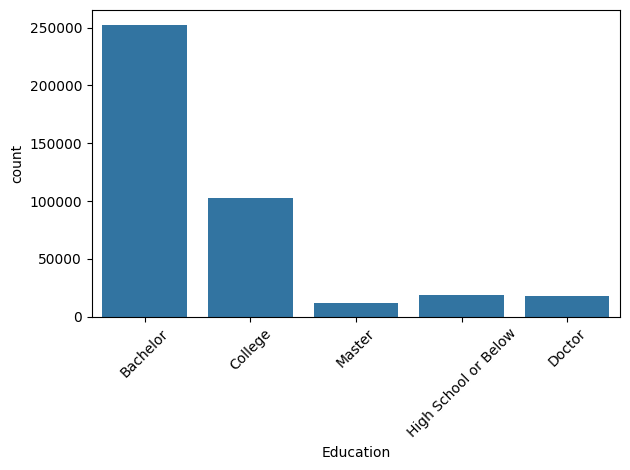

In [18]:
sns.countplot(x="Education",data= df)
plt.xticks(rotation=45)
plt.tight_layout()

Distinta cantidad de Muestras!

### Simetría

In [19]:
for edu in df["Education"].unique():
    df_edu = df[df["Education"] == edu]
    skewness = df_edu["Flights Booked"].skew()
    print(f"Asimetría en {edu}: {skewness}")

Asimetría en Bachelor: 1.0407988489875872
Asimetría en College: 1.0176562623963163
Asimetría en Master: 0.9971196606756202
Asimetría en High School or Below: 1.0148261090670256
Asimetría en Doctor: 1.027274998551084


Simetrías con sesgo a la derecha

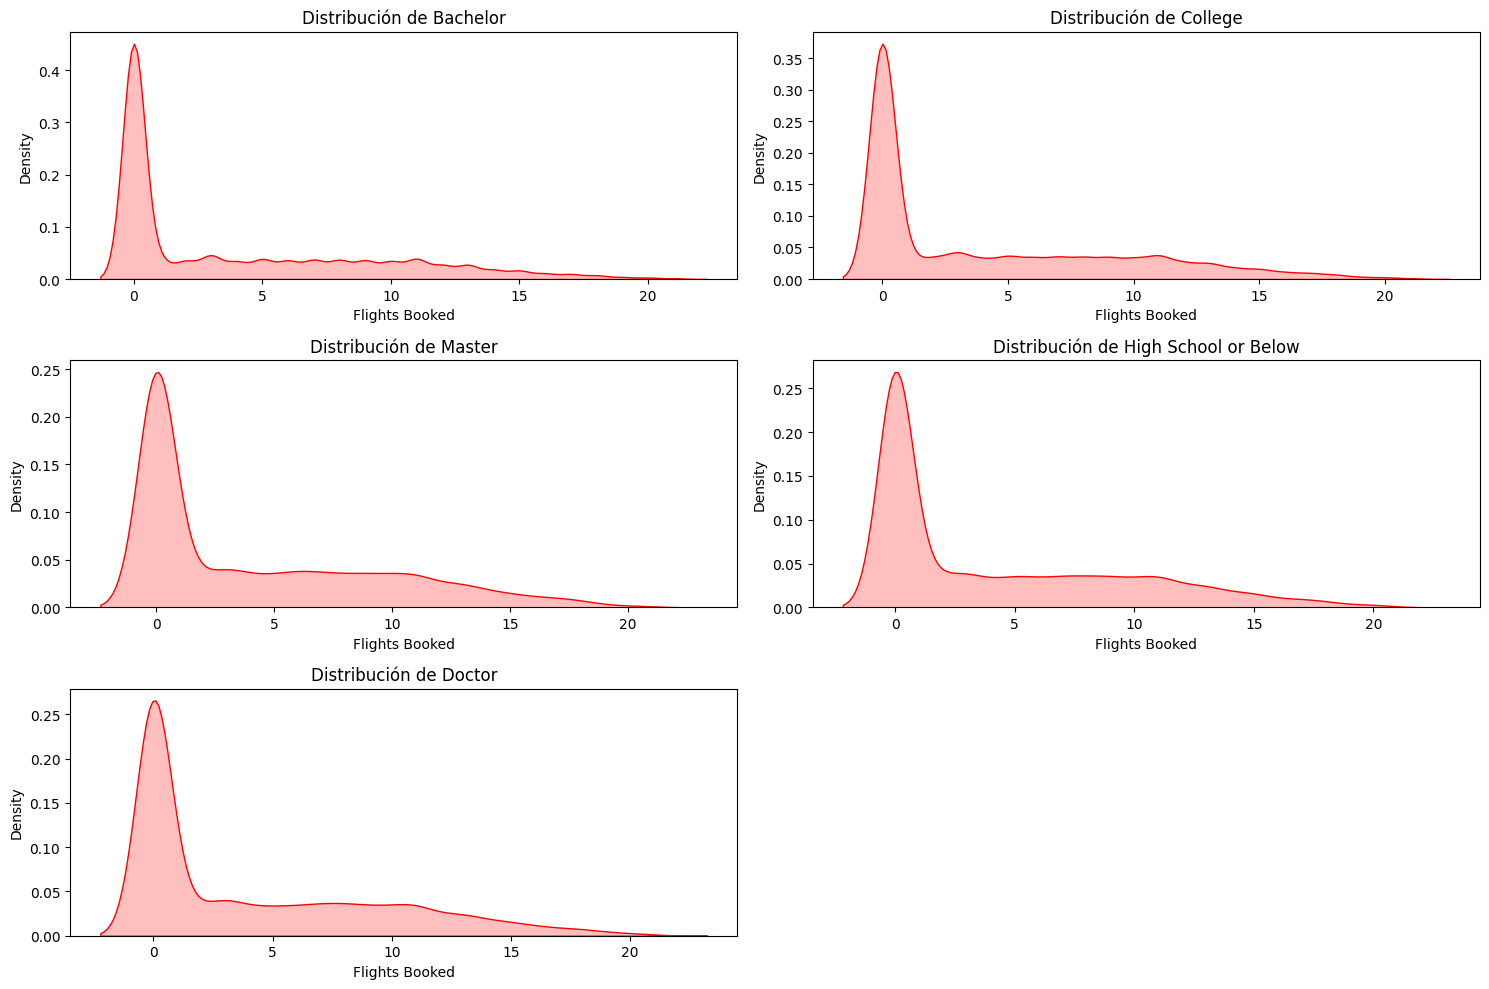

In [20]:
lista_education = df["Education"].unique().tolist()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice, edu in enumerate(lista_education):
    sns.kdeplot(x="Flights Booked", data=df[df["Education"] == edu], ax=axes[indice], fill=True, color="red")
    axes[indice].set_title(f"Distribución de {edu}")

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [21]:
for edu in df["Education"].unique():
    operations = Asunciones(df[df["Education"]==edu],"Flights Booked")
    kolmorogov = operations.identificar_normalidad_analitica(metodo="kolmogorov")
  

Para la columna Flights Booked, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
Para la columna Flights Booked, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
Para la columna Flights Booked, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
Para la columna Flights Booked, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
Para la columna Flights Booked, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.


### No es normal, por lo que es No Paramétrica

Vamos a realizar el test de Kruskal Willys al tener que mirar más de dos grupos

In [22]:
elegir_test(df,"Education","Flights Booked",dependencia=False)

Test Kruskal-Wallis
KruskalResult(statistic=np.float64(17.532618623121756), pvalue=np.float64(0.0015225470219889365))
Hay una diferencia significativa entre los datos


# Conclusiones
- Según los resultados estadísticos, podemos no aceptar H0, por falta de evidencias de la misma
- Podemos concluir que existe una diferencia significativa entre el número de vuelos reservados y el nivel educativo

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

# Hipótesis
- Nula (H0): No existe una diferencia significativa en el salario de los clientes en funcion del género de los mismos
- Alternativa (H1): Existe una diferencia significativa en el salario de los clientes en función del genero de los mismos

# Verificar si es paramétrica 

### Normalidad

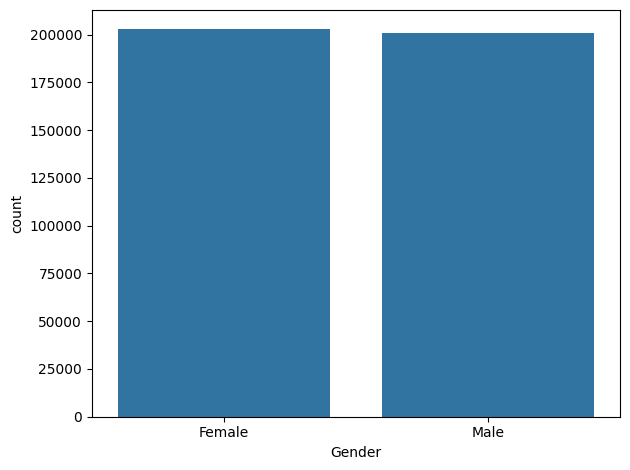

In [27]:
sns.countplot(x="Gender",data= df)
plt.tight_layout()

Parece que tenemos un número parecido de muestras, veamos su simetría

In [28]:
for genero in df["Gender"].unique():
    df_gen = df[df["Gender"] == genero]
    skewness = df_gen["Salary"].skew()
    print(f"Asimetría en {genero}:{skewness}")

Asimetría en Female:3.88577411013393
Asimetría en Male:3.863735797327542


Simetrías con sesgo a la derecha extremo

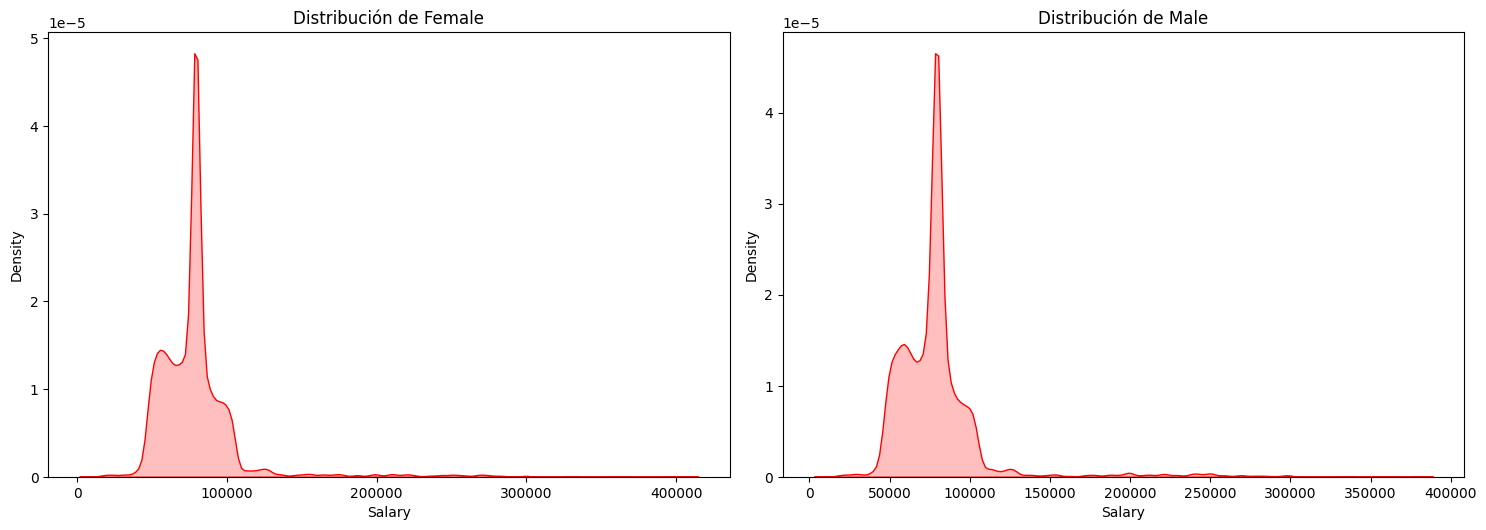

In [39]:
lista_gender = df["Gender"].unique().tolist()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flat

for indice, genero in enumerate(lista_gender):
    sns.kdeplot(x="Salary", data=df[df["Gender"] == genero], ax=axes[indice], fill=True, color="red")
    axes[indice].set_title(f"Distribución de {genero}")

fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
plt.tight_layout()
plt.show()

In [40]:
for gen in df["Gender"].unique():
    operations = Asunciones(df[df["Gender"]==gen],"Salary")
    kolmorogov = operations.identificar_normalidad_analitica(metodo="kolmogorov")
  

Para la columna Salary, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
Para la columna Salary, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.


### No es normal, por lo que es paramétrica
Al ser dos grupos e independientes, realizamos el test de Mann-Whitney U

In [41]:
elegir_test(df,"Gender","Salary",dependencia=False)

Es independiente, haciendo test Mann-Whitney
MannwhitneyuResult(statistic=np.float64(20414698527.0), pvalue=np.float64(0.31343810463633526))
No hay evidencia suficiente para concluir que hay una diferencia significativa.


# Conclusión
- Según los resultados estadísticos, no podemos rechazar H0 por tener evidencias suficientes del mismo
- Podemos concluir que no existe una diferencia significativa entre el salarios de los clientes en función del género de los mismos